In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pickle

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("../dataset5/data/dataset.csv")

In [3]:
df2 = df.drop(['currentTick','playerId','playerName','X','Y','Z', 'yaw', 'pitch', 'targetId','targetName','targetX','targetY','targetZ'], axis=1)

In [4]:
df2

,deltaX,deltaY,deltaZ,deltaYaw,deltaPitch,deltaAimArc,isFlashed,isCrouching,isInAir,utilityDmgDone,supportUtilityUsed,KDR,isFiring,targetDeltaX,targetDeltaY,targetDeltaZ,isHurt,dmgDone,distToTarget,targetHitArea,weaponUsed,weaponCategory,isScoping,isTargetBlind,shotTargetThroughSmoke,targetReturnedDmg,Label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,False,0.0,2.0,1.000000,False,0.000000,0.000000,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,-0.078308,-0.044434,-0.026367,-1.323853,-0.318604,28.367904,0.0,0.0,False,0.0,2.0,1.000000,False,-0.606720,-0.130192,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,0.015717,-0.037720,0.000000,-1.263428,-0.351562,27.313905,0.0,0.0,False,0.0,2.0,1.000000,False,-0.506760,-0.132717,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,0.077820,-0.021118,0.031250,-0.758057,-0.247192,16.602574,0.0,0.0,False,0.0,2.0,1.000000,False,-0.407074,-0.134075,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,0.125092,-0.021851,0.041992,-0.543823,-0.247192,12.437608,0.0,0.0,False,0.0,2.0,1.000000,False,-0.307831,-0.133984,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468512,0.000000,0.000000,0.000000,0.000000,0.131836,3.010226,0.0,0.0,False,0.0,2.0,0.181818,False,0.000000,0.000000,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1468513,0.000000,0.000000,0.000000,0.000000,0.065918,1.505113,0.0,0.0,False,0.0,2.0,0.181818,False,0.000000,0.000000,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1468514,0.000000,0.000000,0.000000,0.065918,0.065918,2.127788,0.0,0.0,False,0.0,2.0,0.181818,False,0.000000,0.000000,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1468515,0.000000,0.000000,0.000000,0.000000,0.065918,1.505113,0.0,0.0,False,0.0,2.0,0.181818,False,0.000000,0.000000,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
df2 = df2[(df2['isHurt'] != False) & (~df2['isHurt'].isna())]

In [6]:
df2

,deltaX,deltaY,deltaZ,deltaYaw,deltaPitch,deltaAimArc,isFlashed,isCrouching,isInAir,utilityDmgDone,supportUtilityUsed,KDR,isFiring,targetDeltaX,targetDeltaY,targetDeltaZ,isHurt,dmgDone,distToTarget,targetHitArea,weaponUsed,weaponCategory,isScoping,isTargetBlind,shotTargetThroughSmoke,targetReturnedDmg,Label
8,0.168091,-0.023071,0.055664,-0.049438,-0.318604,6.725509,0.000000,0.0,False,0.0,2.0,1.000000,True,0.058792,-0.098392,0.000000,True,28.0,1195.281448,2.0,weapon_galilar,weapon_category_ar,False,0.000000,False,113.0,False
22,-0.468597,0.055664,-0.156250,0.192261,0.120850,4.719211,0.000000,0.0,False,0.0,2.0,1.000000,True,-0.174728,0.019524,0.000000,True,28.0,1194.932306,2.0,weapon_galilar,weapon_category_ar,False,0.000000,False,113.0,False
36,-0.049072,-0.464630,0.000000,-0.615234,-0.093384,8.189316,0.000000,0.0,False,0.0,1.0,0.285714,True,0.142090,0.200905,0.000000,True,34.0,754.113057,2.0,weapon_ak47,weapon_category_ar,False,0.000000,False,121.0,False
50,0.121216,0.168274,0.000000,0.000000,0.000000,0.000016,0.000000,1.0,False,0.0,1.0,0.285714,True,0.095825,0.134956,0.000000,True,43.0,754.648413,3.0,weapon_ak47,weapon_category_ar,False,0.000000,False,121.0,False
64,0.143311,0.202637,0.000000,-0.120850,0.247192,3.644923,0.000000,2.0,False,0.0,1.0,0.428571,True,1.144775,1.549316,64.000000,True,43.0,759.232228,3.0,weapon_ak47,weapon_category_ar,False,0.000000,False,121.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468455,0.126801,0.556854,0.330212,0.000000,0.131836,2.435827,0.000000,2.0,False,2.0,1.0,0.666667,True,-5.323608,-9.557453,62.901093,True,137.0,1058.608312,1.0,weapon_ak47,weapon_category_ar,False,0.000000,False,0.0,False
1468469,0.240204,0.137756,-10.000000,0.065918,0.411987,5.321876,0.999957,2.0,False,0.0,1.0,0.800000,True,0.000000,0.000000,64.000000,True,138.0,730.864928,1.0,weapon_ak47,weapon_category_ar,False,0.995557,False,108.0,False
1468483,0.150955,0.116333,0.000000,0.000000,0.000000,0.000013,0.000000,1.0,False,0.0,0.0,0.833333,True,0.000000,0.000000,0.000000,True,26.0,899.687713,6.0,weapon_ak47,weapon_category_ar,False,0.000000,False,0.0,False
1468497,0.091599,-0.062378,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,False,0.0,0.0,0.000000,True,0.000000,0.000000,66.000008,True,32.0,897.825367,2.0,weapon_ak47,weapon_category_ar,False,0.000000,False,95.0,False


In [7]:
with open("../dataset5/data/weaponUsedTransformer.pkl", "rb") as f:
    weaponUsedTransformer = pickle.loads(f.read())
with open("../dataset5/data/weaponCategoryTransformer.pkl", "rb") as f:
    weaponCategoryTransformer = pickle.loads(f.read())

In [8]:
target_column = 'Label'
features = df2.drop(target_column, axis=1)  # Features (excluding the target column)
target = df2[target_column]                  # Target variable

In [9]:
features

,deltaX,deltaY,deltaZ,deltaYaw,deltaPitch,deltaAimArc,isFlashed,isCrouching,isInAir,utilityDmgDone,supportUtilityUsed,KDR,isFiring,targetDeltaX,targetDeltaY,targetDeltaZ,isHurt,dmgDone,distToTarget,targetHitArea,weaponUsed,weaponCategory,isScoping,isTargetBlind,shotTargetThroughSmoke,targetReturnedDmg
8,0.168091,-0.023071,0.055664,-0.049438,-0.318604,6.725509,0.000000,0.0,False,0.0,2.0,1.000000,True,0.058792,-0.098392,0.000000,True,28.0,1195.281448,2.0,weapon_galilar,weapon_category_ar,False,0.000000,False,113.0
22,-0.468597,0.055664,-0.156250,0.192261,0.120850,4.719211,0.000000,0.0,False,0.0,2.0,1.000000,True,-0.174728,0.019524,0.000000,True,28.0,1194.932306,2.0,weapon_galilar,weapon_category_ar,False,0.000000,False,113.0
36,-0.049072,-0.464630,0.000000,-0.615234,-0.093384,8.189316,0.000000,0.0,False,0.0,1.0,0.285714,True,0.142090,0.200905,0.000000,True,34.0,754.113057,2.0,weapon_ak47,weapon_category_ar,False,0.000000,False,121.0
50,0.121216,0.168274,0.000000,0.000000,0.000000,0.000016,0.000000,1.0,False,0.0,1.0,0.285714,True,0.095825,0.134956,0.000000,True,43.0,754.648413,3.0,weapon_ak47,weapon_category_ar,False,0.000000,False,121.0
64,0.143311,0.202637,0.000000,-0.120850,0.247192,3.644923,0.000000,2.0,False,0.0,1.0,0.428571,True,1.144775,1.549316,64.000000,True,43.0,759.232228,3.0,weapon_ak47,weapon_category_ar,False,0.000000,False,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468455,0.126801,0.556854,0.330212,0.000000,0.131836,2.435827,0.000000,2.0,False,2.0,1.0,0.666667,True,-5.323608,-9.557453,62.901093,True,137.0,1058.608312,1.0,weapon_ak47,weapon_category_ar,False,0.000000,False,0.0
1468469,0.240204,0.137756,-10.000000,0.065918,0.411987,5.321876,0.999957,2.0,False,0.0,1.0,0.800000,True,0.000000,0.000000,64.000000,True,138.0,730.864928,1.0,weapon_ak47,weapon_category_ar,False,0.995557,False,108.0
1468483,0.150955,0.116333,0.000000,0.000000,0.000000,0.000013,0.000000,1.0,False,0.0,0.0,0.833333,True,0.000000,0.000000,0.000000,True,26.0,899.687713,6.0,weapon_ak47,weapon_category_ar,False,0.000000,False,0.0
1468497,0.091599,-0.062378,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,False,0.0,0.0,0.000000,True,0.000000,0.000000,66.000008,True,32.0,897.825367,2.0,weapon_ak47,weapon_category_ar,False,0.000000,False,95.0


In [10]:
target

8          False
22         False
36         False
50         False
64         False
           ...  
1468455    False
1468469    False
1468483    False
1468497    False
1468511    False
Name: Label, Length: 110561, dtype: object

In [11]:
features['isInAir'] = features['isInAir'].astype(int).values
features['isFiring'] = features['isFiring'].astype(int).values
features['isHurt'] = features['isHurt'].astype(int).values
features['isScoping'] = features['isScoping'].astype(int).values
features['shotTargetThroughSmoke'] = features['shotTargetThroughSmoke'].astype(int).values
    
features["deltaX"] = features["deltaX"].astype(float).values / 64
features["deltaY"] = features["deltaY"].astype(float).values / 64
features["deltaZ"] = features["deltaZ"].astype(float).values / 64
features["deltaYaw"] = features["deltaYaw"].astype(float).values / 64
features["deltaPitch"] = features["deltaPitch"].astype(float).values / 64
features["deltaAimArc"] = features["deltaAimArc"].astype(float).values / 64
features["utilityDmgDone"] = features["utilityDmgDone"].astype(float).values / 64
features["targetDeltaX"] = features["targetDeltaX"].astype(float).values / 64
features["targetDeltaY"] = features["targetDeltaY"].astype(float).values / 64
features["targetDeltaZ"] = features["targetDeltaZ"].astype(float).values / 64
features["dmgDone"] = features["dmgDone"].astype(float).values / 64
features["distToTarget"] = features["distToTarget"].astype(float).values / 128
features["targetReturnedDmg"] = features["targetReturnedDmg"].astype(float).values / 64

features['weaponUsed'] = features['weaponUsed'].replace(-1, "none")
features['weaponCategory'] = features['weaponCategory'].replace(-1, "none")
    
features['weaponUsed'] = weaponUsedTransformer.transform(features['weaponUsed'])
features['weaponCategory'] = weaponCategoryTransformer.transform(features['weaponCategory'])

In [12]:
features

,deltaX,deltaY,deltaZ,deltaYaw,deltaPitch,deltaAimArc,isFlashed,isCrouching,isInAir,utilityDmgDone,supportUtilityUsed,KDR,isFiring,targetDeltaX,targetDeltaY,targetDeltaZ,isHurt,dmgDone,distToTarget,targetHitArea,weaponUsed,weaponCategory,isScoping,isTargetBlind,shotTargetThroughSmoke,targetReturnedDmg
8,0.002626,-0.000360,0.000870,-0.000772,-0.004978,1.050861e-01,0.000000,0.0,0,0.00000,2.0,1.000000,1,0.000919,-0.001537,0.00000,1,0.437500,9.338136,2.0,11,1,0,0.000000,0,1.765625
22,-0.007322,0.000870,-0.002441,0.003004,0.001888,7.373767e-02,0.000000,0.0,0,0.00000,2.0,1.000000,1,-0.002730,0.000305,0.00000,1,0.437500,9.335409,2.0,11,1,0,0.000000,0,1.765625
36,-0.000767,-0.007260,0.000000,-0.009613,-0.001459,1.279581e-01,0.000000,0.0,0,0.00000,1.0,0.285714,1,0.002220,0.003139,0.00000,1,0.531250,5.891508,2.0,1,1,0,0.000000,0,1.890625
50,0.001894,0.002629,0.000000,0.000000,0.000000,2.484848e-07,0.000000,1.0,0,0.00000,1.0,0.285714,1,0.001497,0.002109,0.00000,1,0.671875,5.895691,3.0,1,1,0,0.000000,0,1.890625
64,0.002239,0.003166,0.000000,-0.001888,0.003862,5.695193e-02,0.000000,2.0,0,0.00000,1.0,0.428571,1,0.017887,0.024208,1.00000,1,0.671875,5.931502,3.0,1,1,0,0.000000,0,1.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468455,0.001981,0.008701,0.005160,0.000000,0.002060,3.805980e-02,0.000000,2.0,0,0.03125,1.0,0.666667,1,-0.083181,-0.149335,0.98283,1,2.140625,8.270377,1.0,1,1,0,0.000000,0,0.000000
1468469,0.003753,0.002152,-0.156250,0.001030,0.006437,8.315431e-02,0.999957,2.0,0,0.00000,1.0,0.800000,1,0.000000,0.000000,1.00000,1,2.156250,5.709882,1.0,1,1,0,0.995557,0,1.687500
1468483,0.002359,0.001818,0.000000,0.000000,0.000000,2.094749e-07,0.000000,1.0,0,0.00000,0.0,0.833333,1,0.000000,0.000000,0.00000,1,0.406250,7.028810,6.0,1,1,0,0.000000,0,0.000000
1468497,0.001431,-0.000975,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.0,0,0.00000,0.0,0.000000,1,0.000000,0.000000,1.03125,1,0.500000,7.014261,2.0,1,1,0,0.000000,0,1.484375


In [13]:
target_encoded = target.astype(int).values

In [14]:
features_encoded = features.values

In [15]:
features_encoded

array([[ 2.62641906e-03, -3.60488891e-04,  8.69750977e-04, ...,
         0.00000000e+00,  0.00000000e+00,  1.76562500e+00],
       [-7.32183437e-03,  8.69750969e-04, -2.44140625e-03, ...,
         0.00000000e+00,  0.00000000e+00,  1.76562500e+00],
       [-7.66754156e-04, -7.25984578e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.89062500e+00],
       ...,
       [ 2.35867500e-03,  1.81770328e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.43122672e-03, -9.74655156e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.48437500e+00],
       [ 4.92095937e-04,  4.48226922e-05,  8.82031202e-01, ...,
         0.00000000e+00,  0.00000000e+00,  2.10937500e+00]])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.25, random_state=4509)

In [18]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

F1 Score: 0.9202220701194007
Precision: 0.9145880574452003
Recall: 0.9259259259259259
Accuracy: 0.9620491299157049


Confusion Matrix:


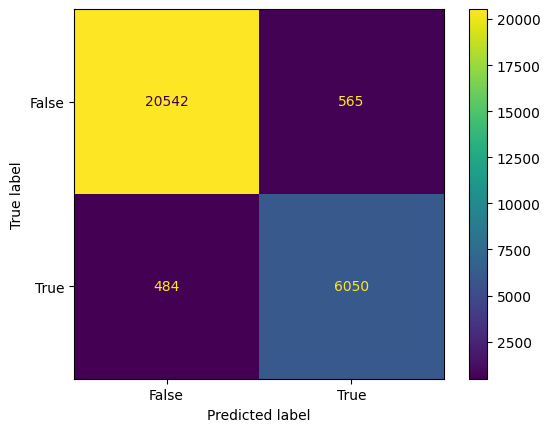

In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cmd = ConfusionMatrixDisplay(cm, display_labels = [False, True])
cmd.plot()

In [22]:
# Calculate TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

True Positives: 6050
True Negatives: 20542
False Positives: 565
False Negatives: 484


In [23]:
s = pickle.dumps(model)

In [24]:
with open("DTmodel.pkl", "wb") as f:
    f.write(s)